<a href="https://colab.research.google.com/github/filmerxyz/JSTP-22_SkinDiseaseClassificationUsingMachineLearning/blob/master/MNIST_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST**

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

# **Check GPU**

In [1]:
!nvidia-smi

Mon May 18 14:48:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# **Import Libraries**

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

# **Load Data**

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# **Reshape Data**

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# **One Hot Encoding**

In [0]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# **Convert From Integers To Floats**

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
x_train_norm  = x_train/ 255.0
x_test_norm = x_test/ 255.0

# **Build Model**

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Training**

In [11]:
history = model.fit(x_train_norm,
                    y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1821 - accuracy: 0.9438
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0592 - accuracy: 0.9825
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0441 - accuracy: 0.9872
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0350 - accuracy: 0.9896
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0301 - accuracy: 0.9911
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0255 - accuracy: 0.9929
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0217 - accuracy: 0.9936
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0197 - accuracy: 0.9942
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0177 - accuracy: 0.9946
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.016

# **Graph**

### **Accuracy**

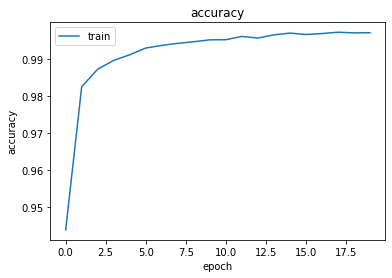

In [12]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.title('accuracy')
plt.show()

### **Loss**

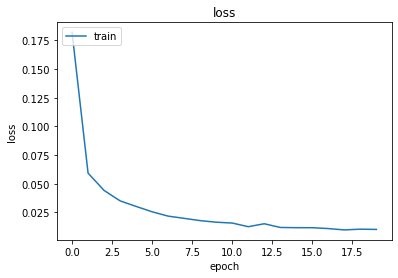

In [13]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.title('loss')
plt.show()

# **Test**

In [14]:
scores = model.evaluate(x_test_norm, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0353 - accuracy: 0.9913


In [15]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.03531903401017189
Test accuracy: 0.9912999868392944
